In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107156 entries, 0 to 107155
Data columns (total 8 columns):
SNo                107156 non-null int64
ObservationDate    107156 non-null object
Province/State     73987 non-null object
Country/Region     107156 non-null object
Last Update        107156 non-null object
Confirmed          107156 non-null float64
Deaths             107156 non-null float64
Recovered          107156 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.5+ MB


In [5]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,107156.00000,107156.000000,107156.000000,1.071560e+05
mean,53578.50000,17148.694623,733.187586,9.689788e+03
std,30933.41706,52120.015488,2778.990423,5.467432e+04
min,1.00000,0.000000,0.000000,0.000000e+00
25%,26789.75000,205.000000,3.000000,3.000000e+00
50%,53578.50000,1857.000000,37.000000,3.400000e+02
75%,80367.25000,9286.000000,294.000000,3.258000e+03
max,107156.00000,990795.000000,42072.000000,2.403511e+06


In [6]:
df['Province/State'].value_counts()

Unknown                         892
Diamond Princess cruise ship    402
Grand Princess                  360
Amazonas                        326
Gansu                           235
                               ... 
External territories              1
Wuhan Evacuee                     1
Dadar Nagar Haveli                1
Fench Guiana                      1
Chicago                           1
Name: Province/State, Length: 723, dtype: int64

In [7]:
df['Country/Region'].value_counts()

US                     11602
Russia                  8588
Mainland China          7221
Japan                   5270
Mexico                  3731
                       ...  
Cape Verde                 1
East Timor                 1
North Ireland              1
Republic of Ireland        1
St. Martin                 1
Name: Country/Region, Length: 223, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107156 entries, 0 to 107155
Data columns (total 8 columns):
SNo                107156 non-null int64
ObservationDate    107156 non-null object
Province/State     73987 non-null object
Country/Region     107156 non-null object
Last Update        107156 non-null object
Confirmed          107156 non-null float64
Deaths             107156 non-null float64
Recovered          107156 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.5+ MB


In [9]:
df['Recovered'].value_counts()

0.0        24323
1.0         1631
2.0          794
18.0         592
3.0          550
           ...  
7821.0         1
9357.0         1
26099.0        1
87120.0        1
15343.0        1
Name: Recovered, Length: 19367, dtype: int64

In [10]:
df['Province/State'].fillna('Unknown',inplace=True)

In [11]:
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Last Update'] 

0        2020-01-22 17:00:00
1        2020-01-22 17:00:00
2        2020-01-22 17:00:00
3        2020-01-22 17:00:00
4        2020-01-22 17:00:00
                 ...        
107151   2020-09-11 04:46:23
107152   2020-09-11 04:46:23
107153   2020-09-11 04:46:23
107154   2020-09-11 04:46:23
107155   2020-09-11 04:46:23
Name: Last Update, Length: 107156, dtype: datetime64[ns]

In [12]:
df['Hour'] = df['Last Update'].dt.hour
df['Month'] = df['Last Update'].dt.month
df['DayOfWeek'] = df['Last Update'].dt.weekday

In [13]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Hour,Month,DayOfWeek
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,17,1,2
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,17,1,2
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,17,1,2
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0,17,1,2
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0,17,1,2
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0,17,1,2
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2


In [14]:
df_2=df['Country/Region'].value_counts().head(20)

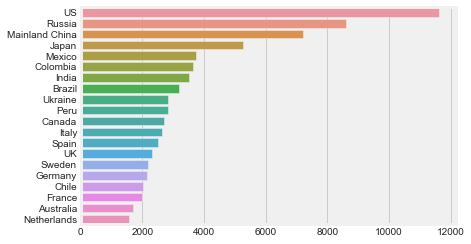

In [15]:
sns.barplot(y=df_2.index,x=df_2.values)

In [16]:
(df['Province/State']=='Beijing').value_counts()

False    106923
True        233
Name: Province/State, dtype: int64

### Check multiple countries names

In [39]:
country_sorted = list(df['Country/Region'].unique())
country_sorted.sort()
print(country_sorted)

[' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Gambia, The', 'Georgia'

In [41]:
df.loc[df['Country/Region']==' Azerbaijan', 'Country/Region'] = 'Azerbaijan'
df.loc[df['Country/Region']=='Republic of Ireland', 'Country/Region'] = 'Ireland'
df.loc[df['Country/Region']=="('St. Martin',)", 'Country/Region'] = 'St. Martin'

In [44]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Hour,Month,DayOfWeek
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,17,1,2
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,17,1,2
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,17,1,2


In [45]:
df['cases_log'] = df.groupby(['Country/Region','Province/State'])['Confirmed'].shift(1)
df['deaths_log'] = df.groupby(['Country/Region','Province/State'])['Deaths'].shift(1)
df['Daily Cases'] = df['Confirmed'] - df['cases_log']
df['Daily Deaths'] = df['Deaths'] - df['deaths_log']

In [46]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Hour,Month,DayOfWeek,cases_log,deaths_log,Daily Cases,Daily Deaths
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2,NaN,NaN,NaN,NaN
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,17,1,2,NaN,NaN,NaN,NaN
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,17,1,2,NaN,NaN,NaN,NaN
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,17,1,2,NaN,NaN,NaN,NaN
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,17,1,2,NaN,NaN,NaN,NaN


In [49]:
df.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,3629379.0,110335.0,2045122.0
1,Albania,549580.0,16369.0,310399.0
2,Algeria,2944863.0,140689.0,1988171.0
3,Andorra,141809.0,7793.0,108225.0
4,Angola,115567.0,5086.0,42107.0
...,...,...,...,...
215,Western Sahara,1351.0,108.0,1008.0
216,Yemen,151514.0,41906.0,70109.0
217,Zambia,569717.0,13793.0,467401.0
218,Zimbabwe,295998.0,7323.0,164589.0
